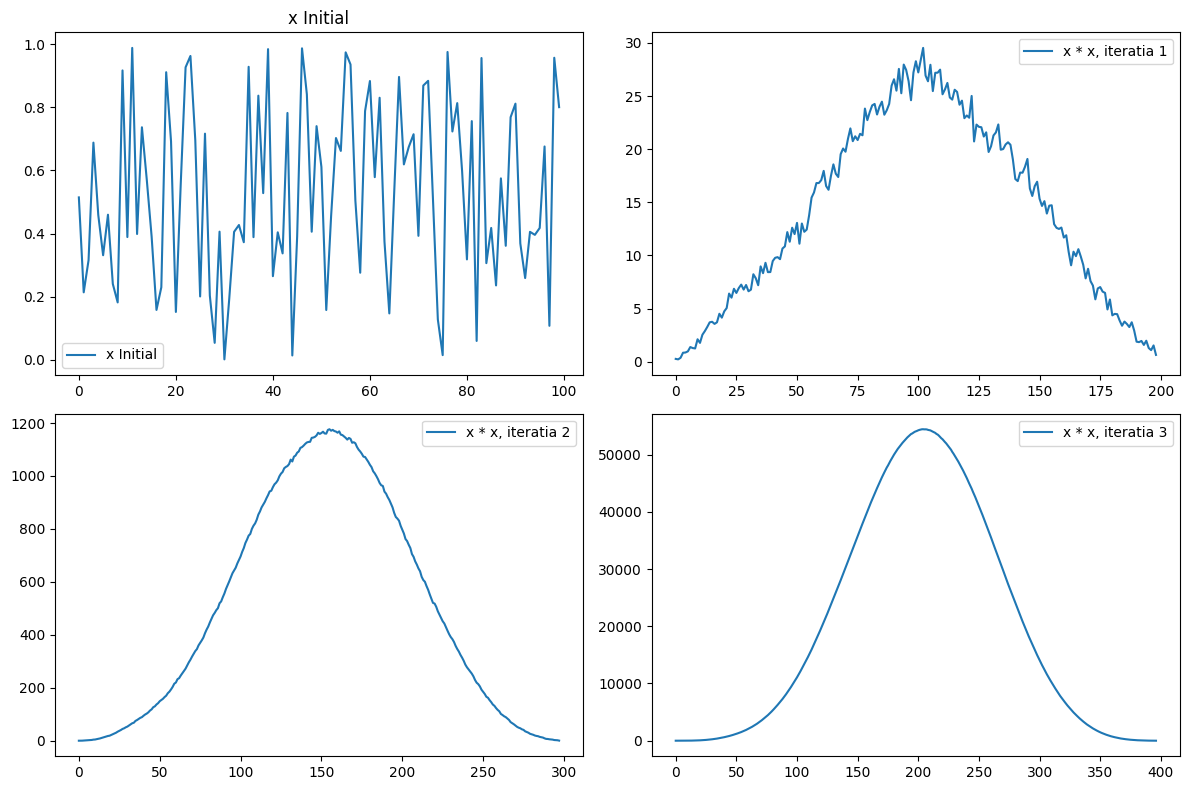

In [13]:
#ex1
import numpy as np
import matplotlib.pyplot as plt

# Se genereaza un vector de numere aleatoare de N=100
N = 100
x = np.random.rand(N)

# Se initializeaza figura pt ploturi
plt.figure(figsize=(12, 8))

# Plot pentru vectorul original
plt.subplot(2, 2, 1)
plt.plot(x, label='x Initial')
plt.title('x Initial')
plt.legend()

prima_iteratie = np.convolve(x, x, mode='full')
plt.subplot(2,2,2)
plt.plot(prima_iteratie, label='x * x, iteratia 1')
plt.legend()

a_doua_iteratie = np.convolve(prima_iteratie, x, mode='full')
plt.subplot(2,2,3)
plt.plot(a_doua_iteratie, label='x * x, iteratia 2')
plt.legend()

a_treia_iteratie = np.convolve(a_doua_iteratie, x, mode='full')
plt.subplot(2,2,4)
plt.plot(a_treia_iteratie, label='x * x, iteratia 3')
plt.legend()

plt.tight_layout()
plt.show()

# Apare o Gausiana


In [15]:
#ex2
from numpy.fft import fft, ifft
import numpy as np

# Setam gradul maxim al polinomului
N = 5

# Generam 2 polinoame aleatoare p(x) si q(x) cu coeficienti intregi
p = np.random.randint(-5, 5, N + 1)
q = np.random.randint(-5, 5, N + 1)

# Calculam produsul celor 2 polinoame prin inmultire directa
def produs_direct_al_polinoamelor(p, q):
    result = np.zeros(len(p) + len(q) - 1)
    for i in range(len(p)):
        for j in range(len(q)):
            result[i + j] += p[i] * q[j]
    return result

r_direct = produs_direct_al_polinoamelor(p, q)

# Calculam produsul celor 2 polinoame folosind FFT
def produs_al_polinoamelor_prin_fft(p, q):
    # Extindem polinoamele cu 0-uri ca sa se evite problemele legate de repetitie(pt ca presupunem ca sunt periodice)
    p_extended = np.append(p, np.zeros(len(q) - 1))
    q_extended = np.append(q, np.zeros(len(p) - 1))

    # Aplicam fft pe polinoamele extinse
    p_fft = fft(p_extended)
    q_fft = fft(q_extended)

    # Facem fft inversa pentru a afla rezultatul
    result_fft = ifft(p_fft * q_fft)

    # Preluam partea reala pentru a evita erorile numerice(rez e rotunjit)
    return np.rint(result_fft).real

r_fft = produs_al_polinoamelor_prin_fft(p, q)

# Afisam polinoamele si produsul lor
print("p(x):", p)
print("q(x):", q)
print("Inmultire directa:", r_direct)
print("Inmultire cu FFT:", r_fft)

p(x): [ 2  2  2 -3 -3 -4]
q(x): [ 4  2 -2 -5 -5 -4]
Inmultire directa: [  8.  12.   8. -22. -42. -44.  -5.  30.  47.  32.  16.]
Inmultire cu FFT: [  8.  12.   8. -22. -42. -44.  -5.  30.  47.  32.  16.]


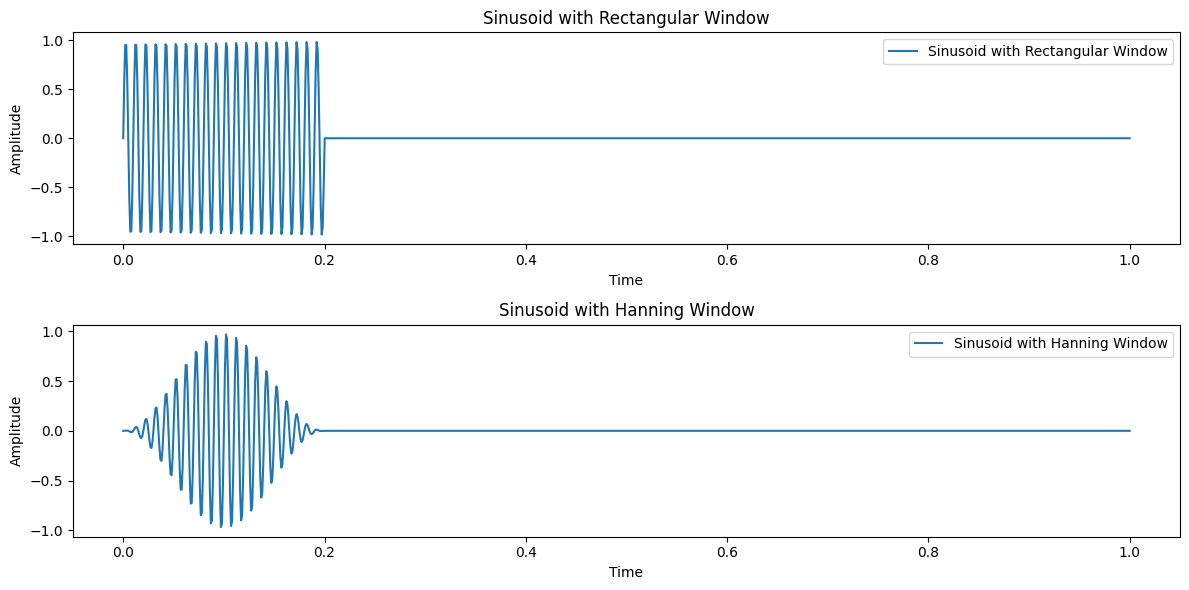

In [16]:
#ex3

import numpy as np
import matplotlib.pyplot as plt

# Definim functiile ca sa cream ferestrele dreptunghiulare si Henning
def rectangular_window(Nw):
    return np.ones(Nw)

def hanning_window(Nw):
    return np.hanning(Nw)

# Parameters for the sinusoid
f = 100  # frequency
A = 1    # amplitude
phi = 0  # phase
Nw = 200 # window size

# Generate the sinusoid
t = np.linspace(0, 1, 1000)  # time vector
sinusoid = A * np.sin(2 * np.pi * f * t + phi)

# Apply the windows to the sinusoid
rect_window = rectangular_window(Nw)
hann_window = hanning_window(Nw)

# Ensure the windows are the same length as the sinusoid for plotting
rect_window_padded = np.pad(rect_window, (0, len(sinusoid) - len(rect_window)), 'constant')
hann_window_padded = np.pad(hann_window, (0, len(sinusoid) - len(hann_window)), 'constant')

# Plot the sinusoid with the two types of windows
plt.figure(figsize=(12, 6))

# Sinusoid with rectangular window
plt.subplot(2, 1, 1)
plt.plot(t, sinusoid * rect_window_padded, label="Sinusoid with Rectangular Window")
plt.title("Sinusoid with Rectangular Window")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

# Sinusoid with Hanning window
plt.subplot(2, 1, 2)
plt.plot(t, sinusoid * hann_window_padded, label="Sinusoid with Hanning Window")
plt.title("Sinusoid with Hanning Window")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
#ex4
import pandas as pd
import numpy as np
from scipy.signal import butter, cheby1, lfilter


# Încărcarea datelor
file_path = '/Users/cristinaantonescu/PycharmProjects/Laborator-PS/Train.csv'
train_data_df = pd.read_csv(file_path)

#a)
# Selectarea datelor pentru 3 zile
three_days_data = train_data_df['Count'][:72]

#b)
window_sizes = [5, 9, 13, 17]
smoothed_signals = {w: np.convolve(three_days_data, np.ones(w), 'valid') / w for w in window_sizes}
print(smoothed_signals)

#c)
# Setează frecvența de eșantionare și frecvența de tăiere
sampling_rate = 1 / 3600  # Presupunând că datele sunt înregistrate orar (în Hz)
cut_off_frequency = 0.0001  # Frecvența de tăiere aleasă (în Hz)

# Calculul frecvenței Nyquist
nyquist_frequency = 0.5 * sampling_rate

# Calculul frecvenței normalizate
normalized_cut_off = cut_off_frequency / nyquist_frequency

# Crearea unui filtru trece-jos Butterworth
order = 5  # Ordinul filtrului
b, a = butter(order, normalized_cut_off, btype='low', analog=False)

# Afișarea valorilor
print("Frecvența de tăiere (Hz):", cut_off_frequency)
print("Frecvența normalizată:", normalized_cut_off)

#d)
# Crearea filtrelor
from scipy.signal import butter, cheby1

# Parametrii filtrelor
order = 5  # Ordinul filtrelor
rp = 5     # Atenuarea ondulațiilor pentru filtrul Chebyshev (în dB)

# Crearea filtrului Butterworth
b_butter, a_butter = butter(order, normalized_cut_off, btype='low', analog=False)

# Crearea filtrului Chebyshev
b_cheby, a_cheby = cheby1(order, rp, normalized_cut_off, btype='low', analog=False)

# Coeficienții filtrelor
print("Filtrul Butterworth (b, a):", b_butter, a_butter)
print("Filtrul Chebyshev (b, a):", b_cheby, a_cheby)

#e)
from scipy.signal import lfilter

# Presupunem că 'data' este seria de date de trafic
# De exemplu: data = train_data_df['Count'][:72]
data = train_data_df['Count']

# Aplicăm filtrul Butterworth
filtered_data_butter = lfilter(b_butter, a_butter, data)

# Aplicăm filtrul Chebyshev
filtered_data_cheby = lfilter(b_cheby, a_cheby, data)

# Afișăm datele brute și datele filtrate pentru comparație
print("Date brute:", data[:10])  # Afișează primele 10 valori din datele brute
print("Date filtrate cu Butterworth:", filtered_data_butter[:10])  # Primele 10 valori filtrate cu Butterworth
print("Date filtrate cu Chebyshev:", filtered_data_cheby[:10])  # Primele 10 valori filtrate cu Chebyshev

{5: array([4. , 2.8, 2.8, 2. , 2.8, 2.8, 2.8, 3.6, 4. , 3.2, 4. , 4. , 3.2,
       2.8, 2.8, 2. , 2. , 2.8, 2.8, 2.8, 3.2, 4. , 3.2, 3.6, 3.6, 3.2,
       2.4, 2.4, 2. , 2.4, 2.4, 2.4, 3.6, 4.4, 4.8, 5.6, 5.6, 4.8, 4.4,
       4. , 3.2, 3.2, 3.2, 3.6, 4. , 4. , 4. , 3.6, 2.8, 2. , 2.4, 2.4,
       2.4, 2.4, 2.4, 2. , 2. , 2. , 2. , 2.4, 2.4, 2.4, 2.8, 2.8, 2.8,
       2.8, 2.8, 2.8]), 9: array([3.55555556, 2.88888889, 2.88888889, 2.88888889, 3.11111111,
       3.11111111, 3.55555556, 3.55555556, 3.55555556, 3.11111111,
       3.11111111, 3.11111111, 2.66666667, 2.88888889, 2.88888889,
       2.44444444, 2.66666667, 3.11111111, 3.11111111, 3.33333333,
       3.33333333, 3.33333333, 2.88888889, 2.88888889, 2.88888889,
       2.88888889, 2.44444444, 2.44444444, 2.88888889, 3.33333333,
       3.77777778, 4.22222222, 4.22222222, 4.44444444, 4.44444444,
       4.66666667, 4.66666667, 4.        , 3.77777778, 3.77777778,
       3.77777778, 3.77777778, 3.55555556, 3.33333333, 3.11111111,
      